In [10]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, interpolate_background, sgolay2d
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [3]:
x, y, z, T, t, settings = load_data("kante1")
x = x[0]
y = y[0]
settings = settings[0]
settings

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((3, 19, 0.1), (3, 19, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [12]:
x_bg, y_bg, z_bg, _, _, _ = load_data("background_anschlag")
x_bg = x_bg[0]
y_bg = y_bg[0]
z_bg = z_bg[0][0]

In [13]:
background = interpolate_background(x_bg, y_bg, z_bg, x, y)

<IPython.core.display.Javascript object>


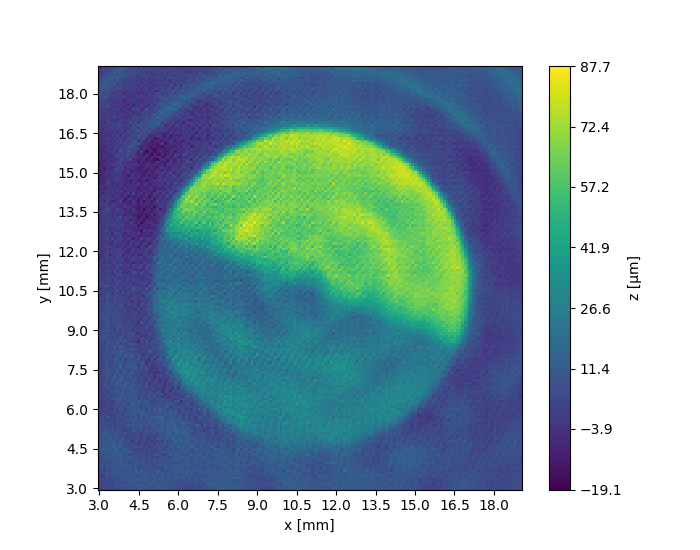

In [22]:
sensor = z[1][0]
signal = background - sensor
signal -= signal.min()
noise = detrend2D(z[1][0] - z[0][0])
#plot(x, y, signal)
#plot(x, y, noise)

diameter = 2.58
sigma = 0.1
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, noise * 0.001, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed)
#profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


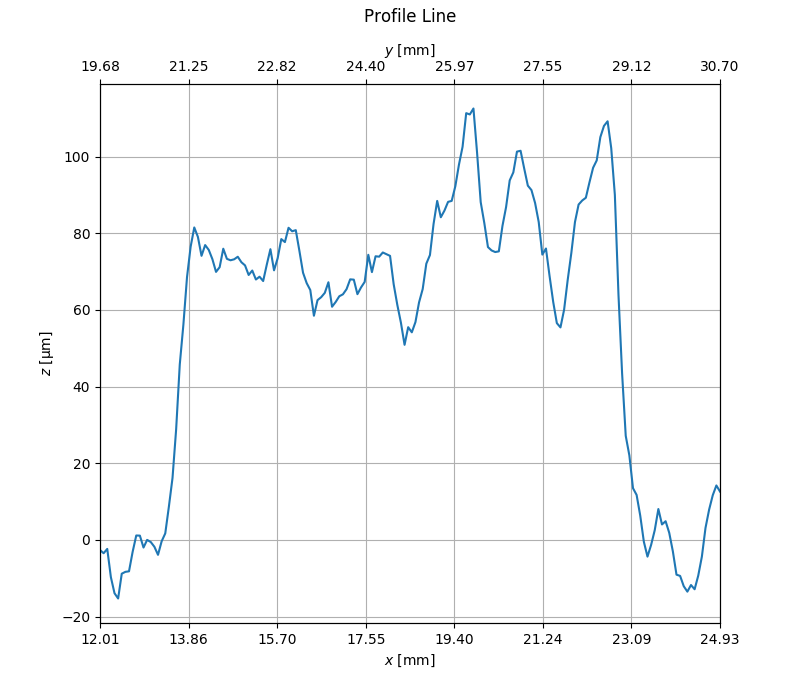

(<matplotlib.figure.Figure at 0x7f302d84bef0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f302dad36d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3031545080>))

In [7]:
plot_profile(x, y, z_reconstructed, *profile.coords)